In [183]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.0)

PROJECT_ROOT_DIR = Path().absolute().parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [184]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [185]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [186]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [187]:
SMOOTH = True

# vvc medium sac d2d one stage

500
500
500
500
500
500
500
500
750
500
500


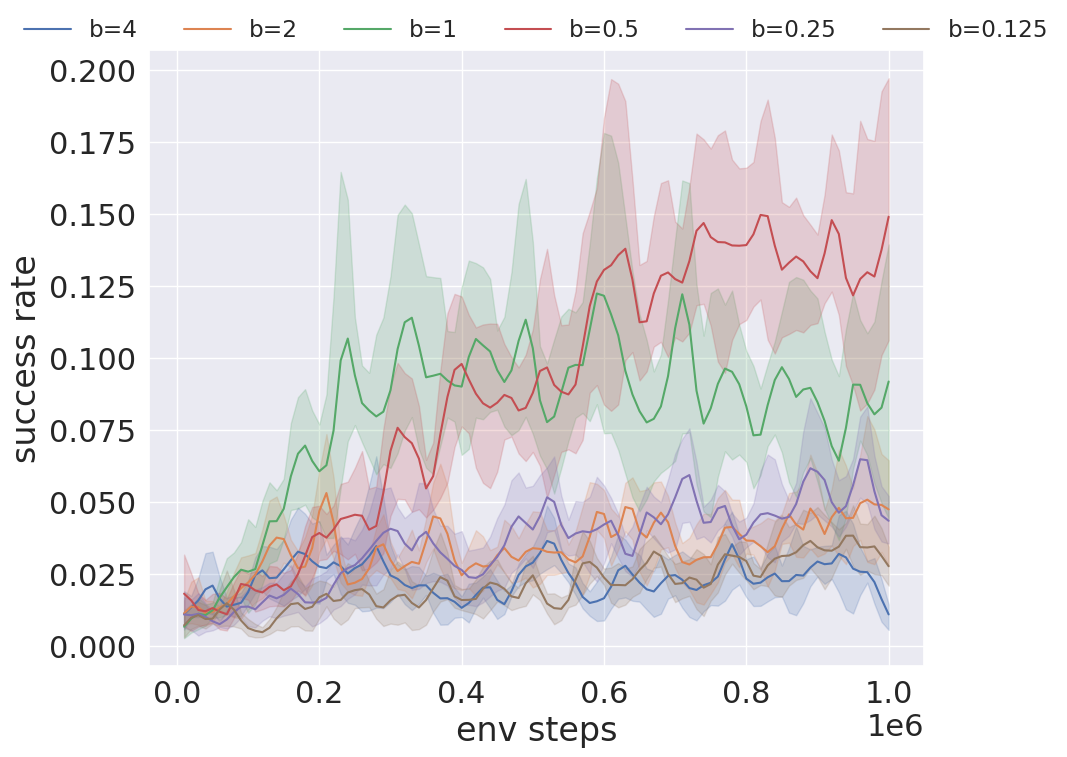

In [188]:
files = [
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1_1e6 = pd.concat([load_two_stage_data("b=2 to b=1 (1e6) ", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1_1e6))



first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))

data_plot = pd.concat([
df_b_4,
df_b_2,
df_b_1,
df_b_05,
df_b_025,
df_b_0125,
# df_two_stage_b_2_b1,
# df_two_stage_b_2_b05,
# df_two_stage_b_2_b025,
# df_two_stage_b_2_b0125
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


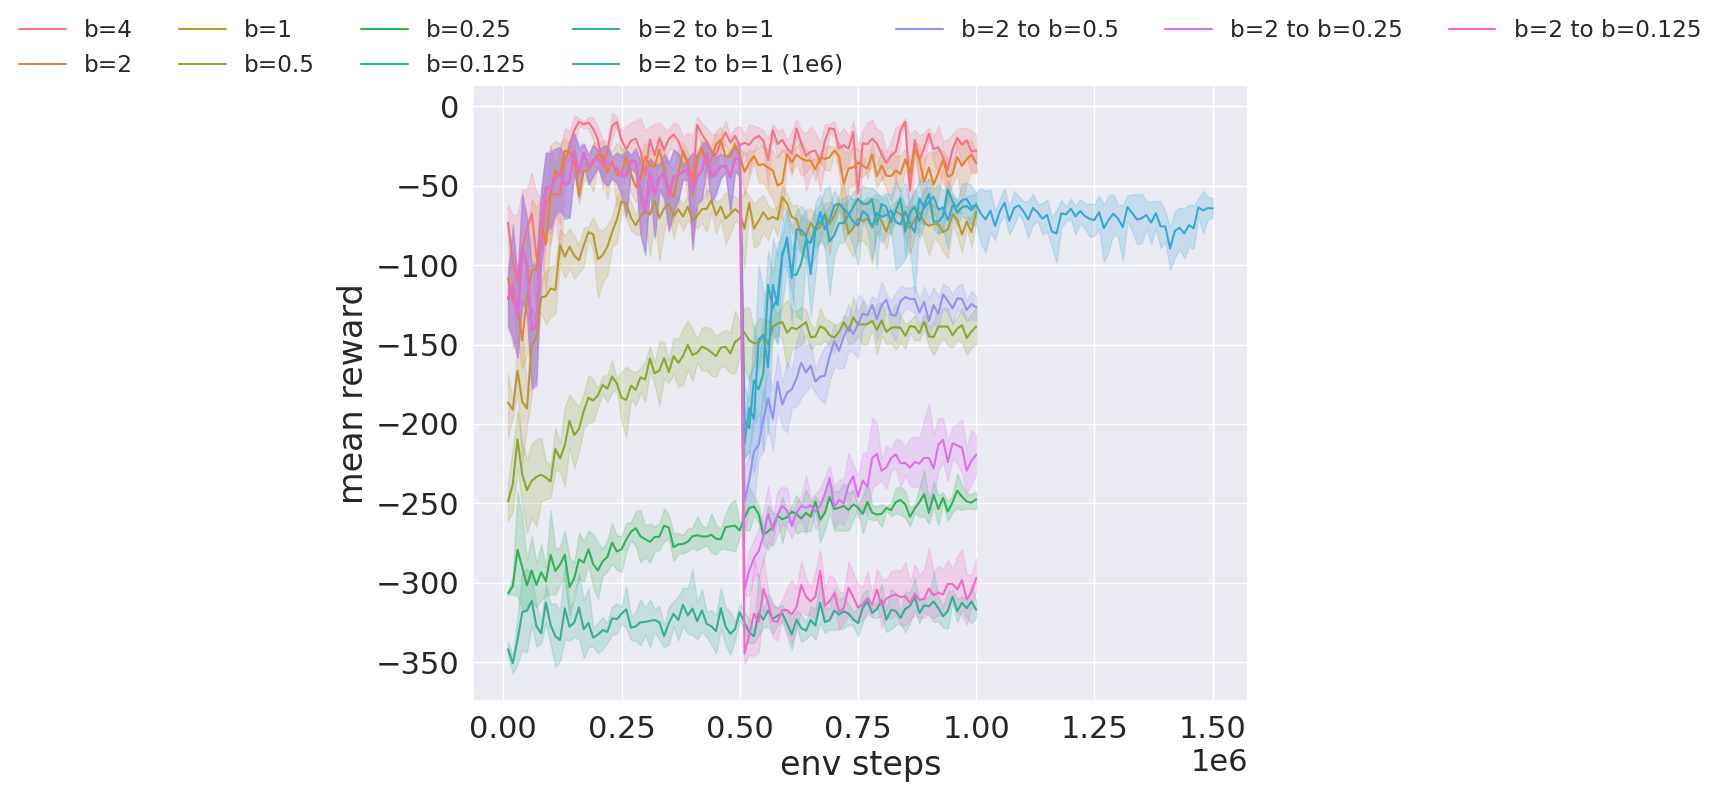

In [189]:
data_plot2 = pd.concat([
df_b_4,
df_b_2,
df_b_1,
df_b_05,
df_b_025,
df_b_0125,
df_two_stage_b_2_b1,
df_two_stage_b_2_b1_1e6,
df_two_stage_b_2_b05,
df_two_stage_b_2_b025,
df_two_stage_b_2_b0125
])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

500
500
500
500
500
500
500
500
500
500


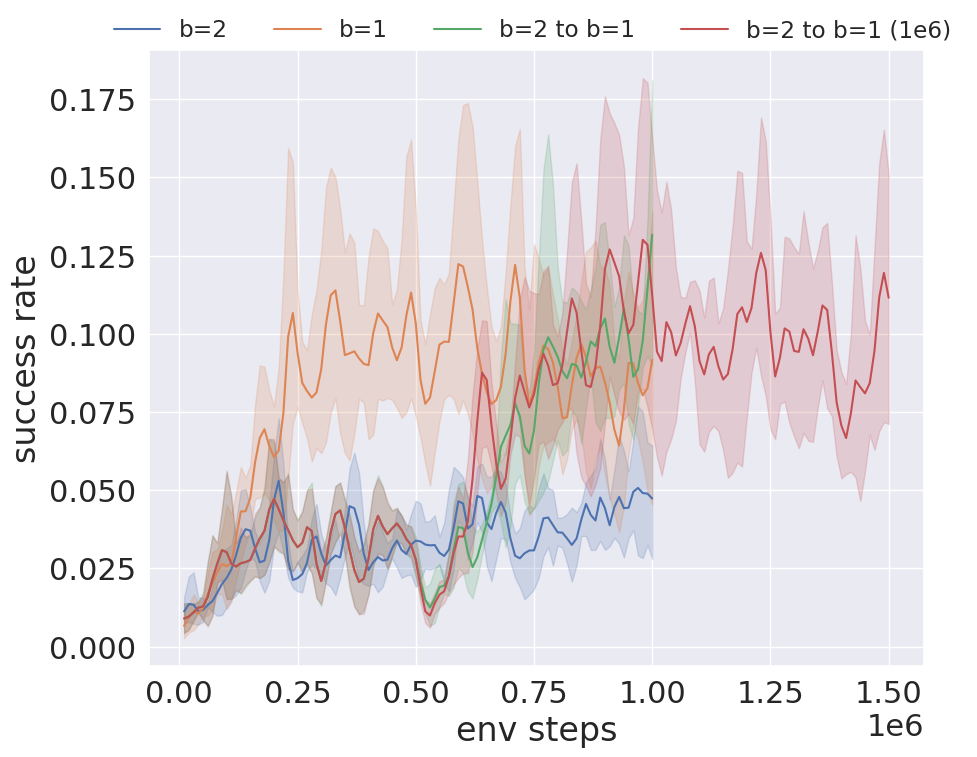

In [190]:
files = [
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))

data_plot = pd.concat([
#df_b_4,
df_b_2,
df_b_1,
# df_b_05,
# df_b_025,
# df_b_0125,
df_two_stage_b_2_b1,
df_two_stage_b_2_b1_1e6
# df_two_stage_b_2_b05,
# df_two_stage_b_2_b025,
# df_two_stage_b_2_b0125

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


500
500
500
500
500
500
500
500
500
500


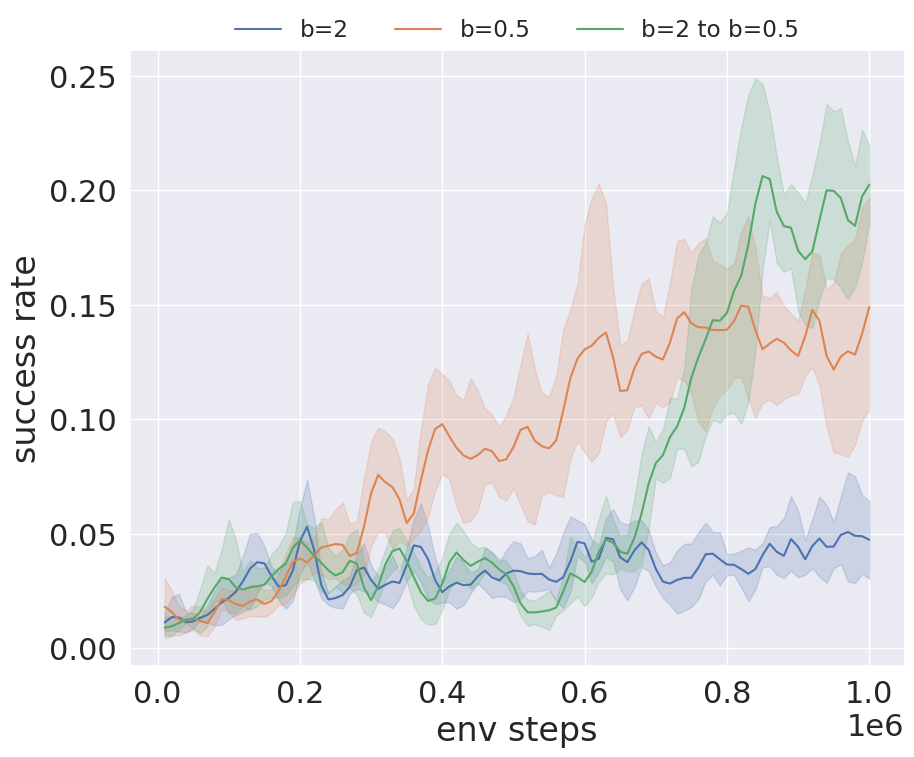

In [191]:
files = [
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))

data_plot = pd.concat([
#df_b_4,
df_b_2,
#df_b_1,
df_b_05,
# df_b_025,
# df_b_0125,
# df_two_stage_b_2_b1,
df_two_stage_b_2_b05,
# df_two_stage_b_2_b025,
# df_two_stage_b_2_b0125

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


500
500
500
500
500
500
500
500
500
500


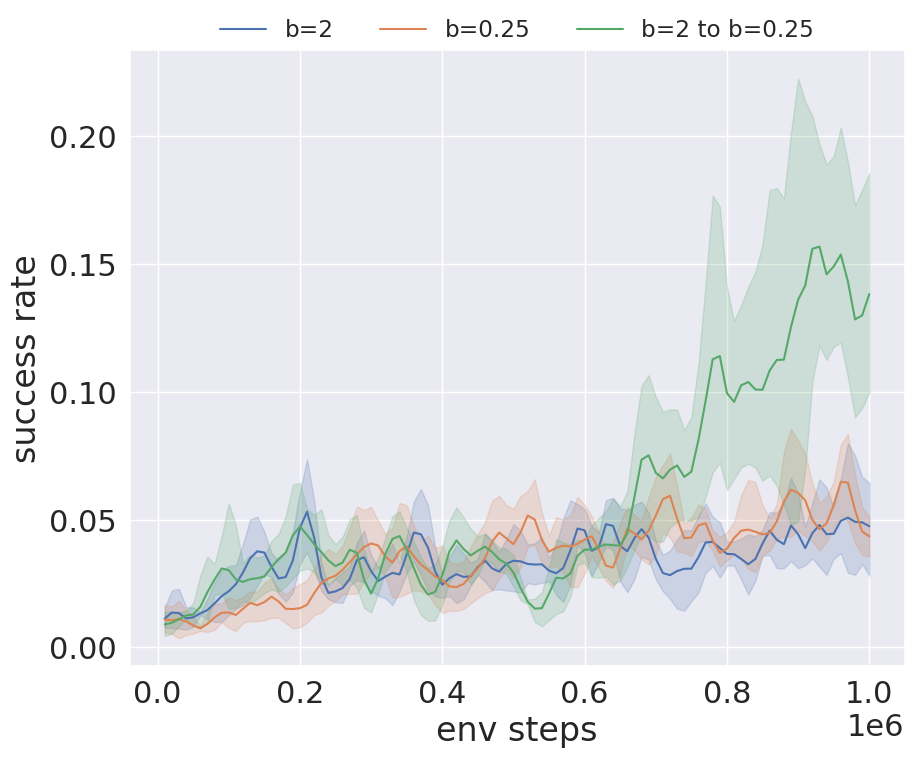

In [192]:
files = [
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))

data_plot = pd.concat([
#df_b_4,
df_b_2,
#df_b_1,
# df_b_05,
df_b_025,
# df_b_0125,
#df_two_stage_b_2_b1,
# df_two_stage_b_2_b05,
df_two_stage_b_2_b025,
# df_two_stage_b_2_b0125

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


500
500
500
500
500
500
500
500
500
500


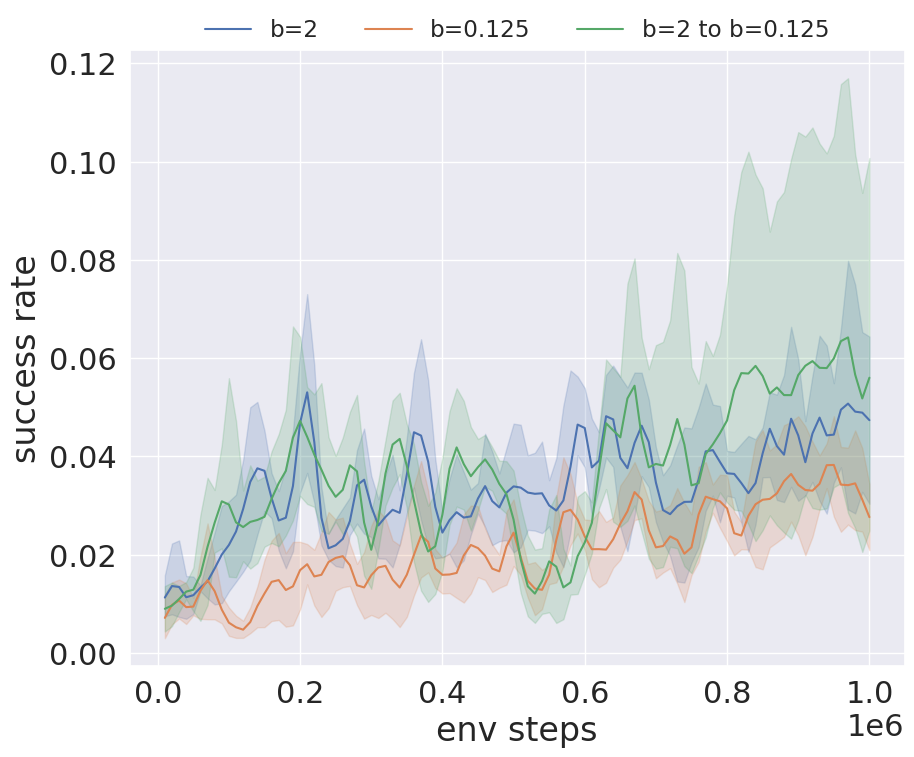

In [193]:
files = [
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))

data_plot = pd.concat([
#df_b_4,
df_b_2,
#df_b_1,
# df_b_05,
# df_b_025,
df_b_0125,
#df_two_stage_b_2_b1,
# df_two_stage_b_2_b05,
# df_two_stage_b_2_b025,
df_two_stage_b_2_b0125

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


## VVC D2D her medium

500
500
500
250
500


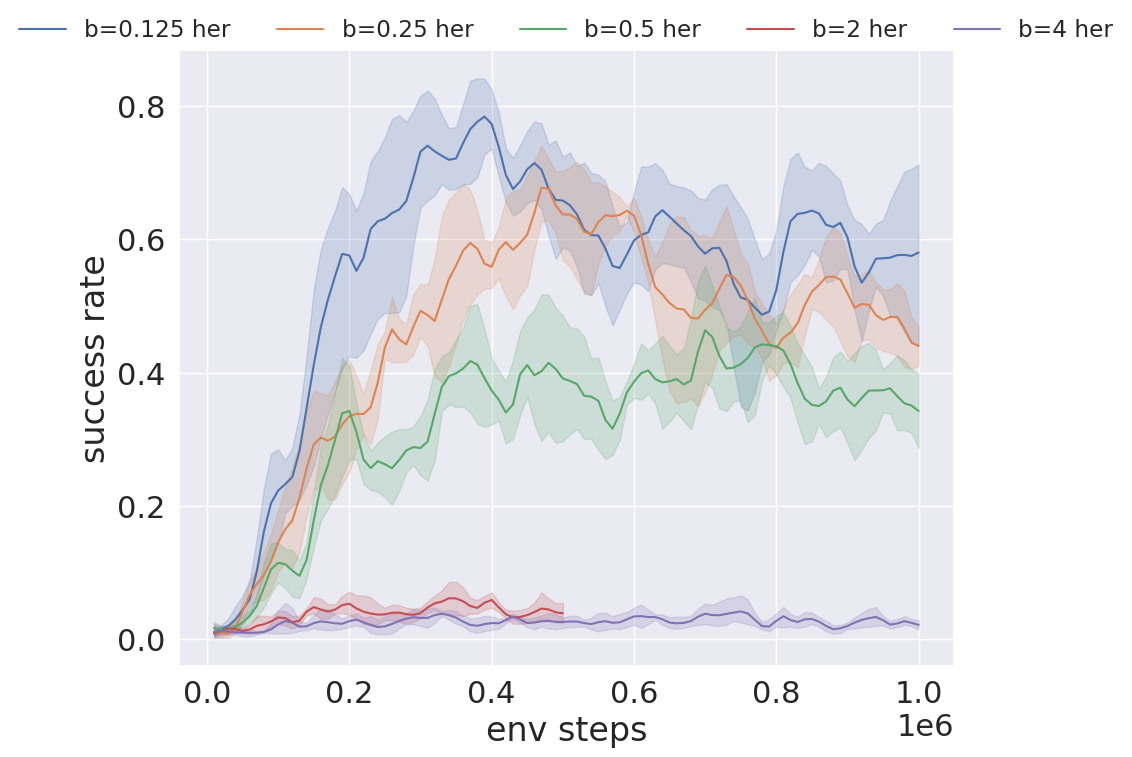

In [194]:
files = [
    "D2D/VVC/medium/her/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/her/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/her/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/her/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/her/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_her = pd.concat([load_data("b=0.5 her", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_her))


files = [
    "D2D/VVC/medium/her/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/her/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/her/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/her/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/her/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025_her = pd.concat([load_data("b=0.25 her", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025_her))


files = [
    "D2D/VVC/medium/her/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/her/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/her/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/her/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/her/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125_her = pd.concat([load_data("b=0.125 her", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125_her))



files = [
    "D2D/VVC/medium/her/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/her/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/her/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/her/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/her/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2_her = pd.concat([load_data("b=2 her", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2_her))


files = [
    "D2D/VVC/medium/her/b_4/sac_10hz_128_128_b_4_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/her/b_4/sac_10hz_128_128_b_4_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/her/b_4/sac_10hz_128_128_b_4_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/her/b_4/sac_10hz_128_128_b_4_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/her/b_4/sac_10hz_128_128_b_4_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4_her = pd.concat([load_data("b=4 her", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4_her))


data_plot = pd.concat([
df_b_0125_her,
df_b_025_her,
df_b_05_her,
df_b_2_her,
df_b_4_her
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

## Goal Space easy to medium

### Goal Space easy to medium b = 1

500
500
500


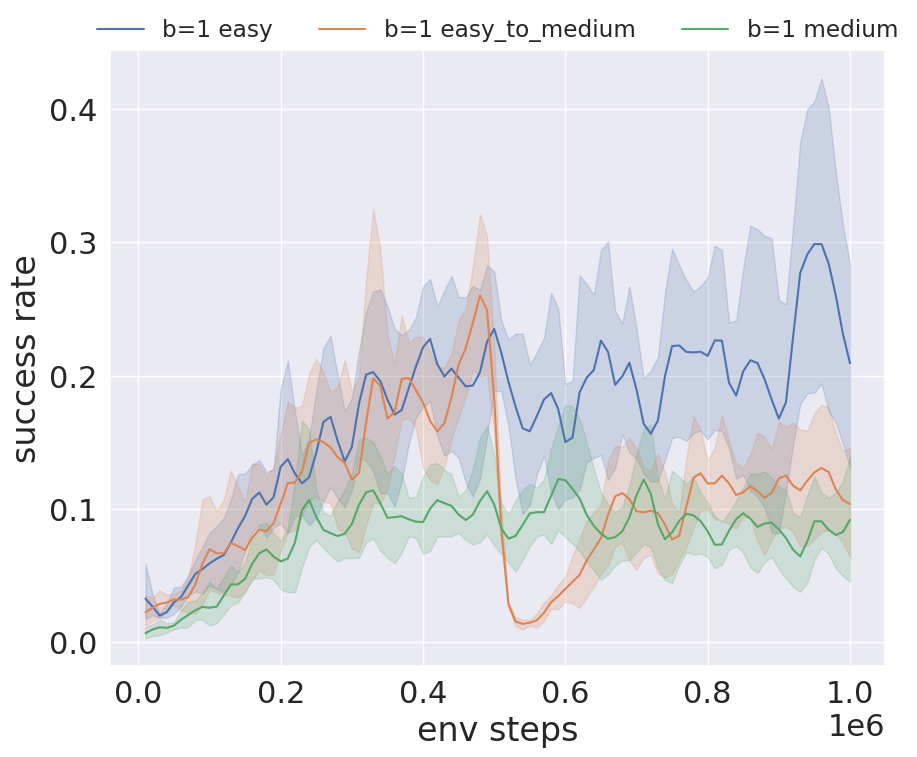

In [195]:
files = [
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL",  

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1esay = pd.concat([load_data("b=1 easy", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1esay))


first_files = [
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_3_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_2_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_3_singleRL",
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_two_stage_easy_to_medium = pd.concat([load_two_stage_data("b=1 easy_to_medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_two_stage_easy_to_medium))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium = pd.concat([load_data("b=1 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium))




data_plot = pd.concat([
df_b_1esay,
df_b_1_two_stage_easy_to_medium,
df_b_1_medium,
# df_b_05esay,
# df_b_05medium,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


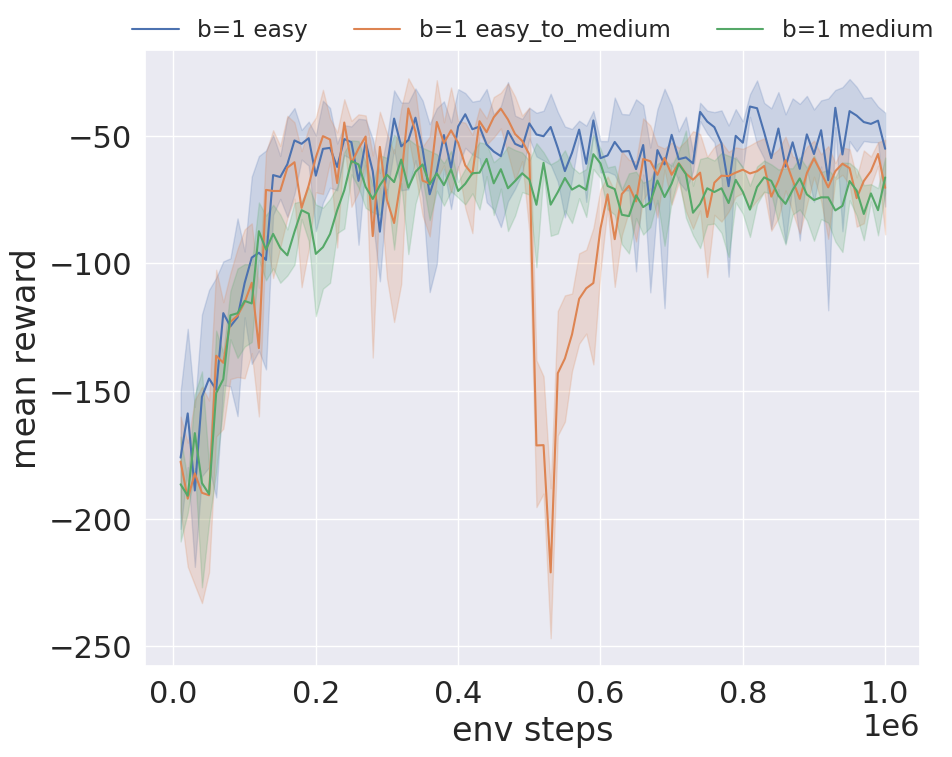

In [196]:
data_plot2 = pd.concat([
df_b_1esay,
df_b_1_two_stage_easy_to_medium,
df_b_1_medium,

])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

### Goal Space easy to medium b = 0.5

500
500
500


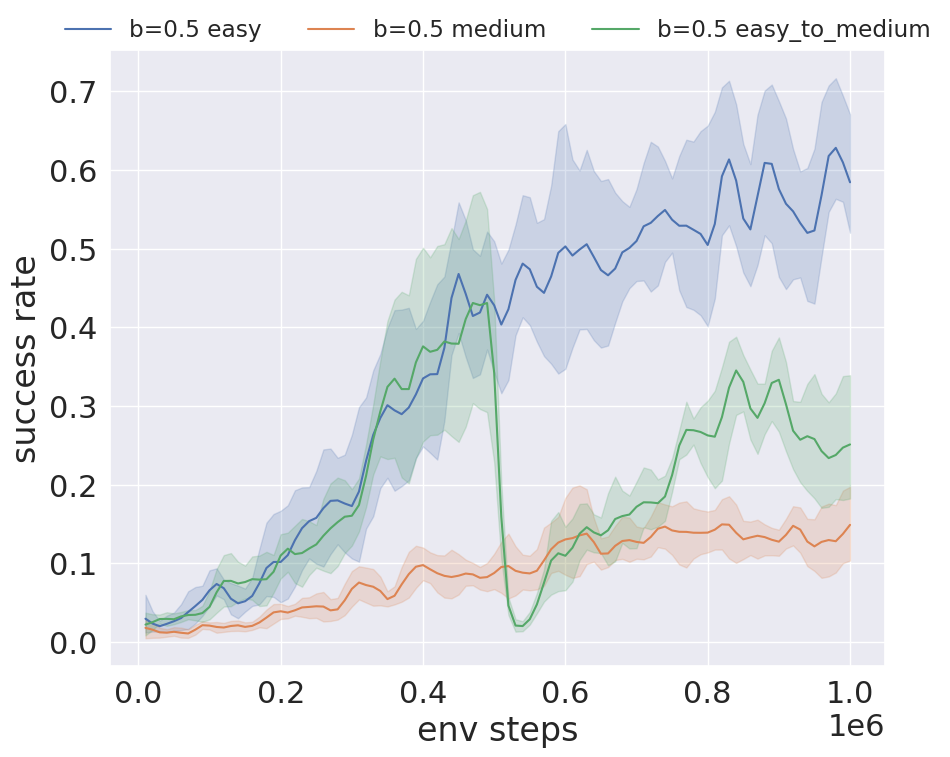

In [197]:
files = [
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05esay = pd.concat([load_data("b=0.5 easy", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05esay))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05medium = pd.concat([load_data("b=0.5 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05medium))


first_files = [
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5stepsac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRLs_seed_3_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_2_singleRL",
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_3_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_5_singleRL",    
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_two_stage_easy_to_medium = pd.concat([load_two_stage_data("b=0.5 easy_to_medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_two_stage_easy_to_medium))

data_plot = pd.concat([
df_b_05esay,
df_b_05medium,
df_b_05_two_stage_easy_to_medium
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")
first_files = [
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5stepsac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRLs_seed_3_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_2_singleRL",
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_3_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_5_singleRL",    
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_two_stage_easy_to_medium = pd.concat([load_two_stage_data("b=0.5 easy_to_medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_two_stage_easy_to_medium))
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

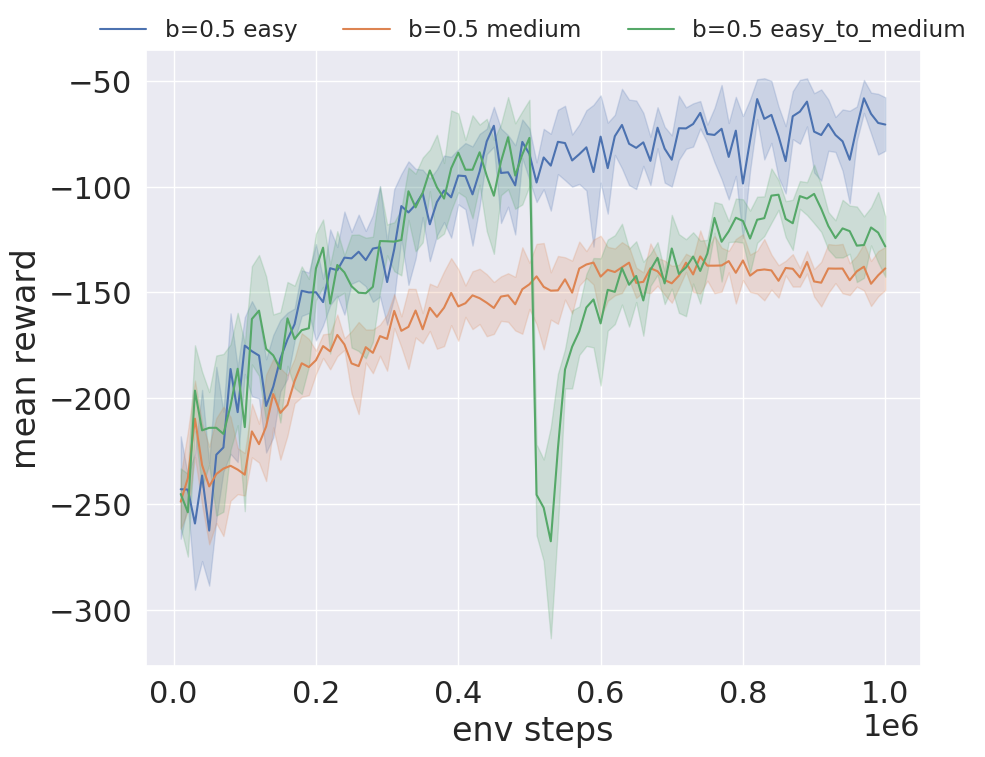

In [198]:
data_plot2 = pd.concat([
df_b_05esay,
df_b_05medium,
df_b_05_two_stage_easy_to_medium
])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

## E2D

### E2D b = 0.5

250
500
500
500
500


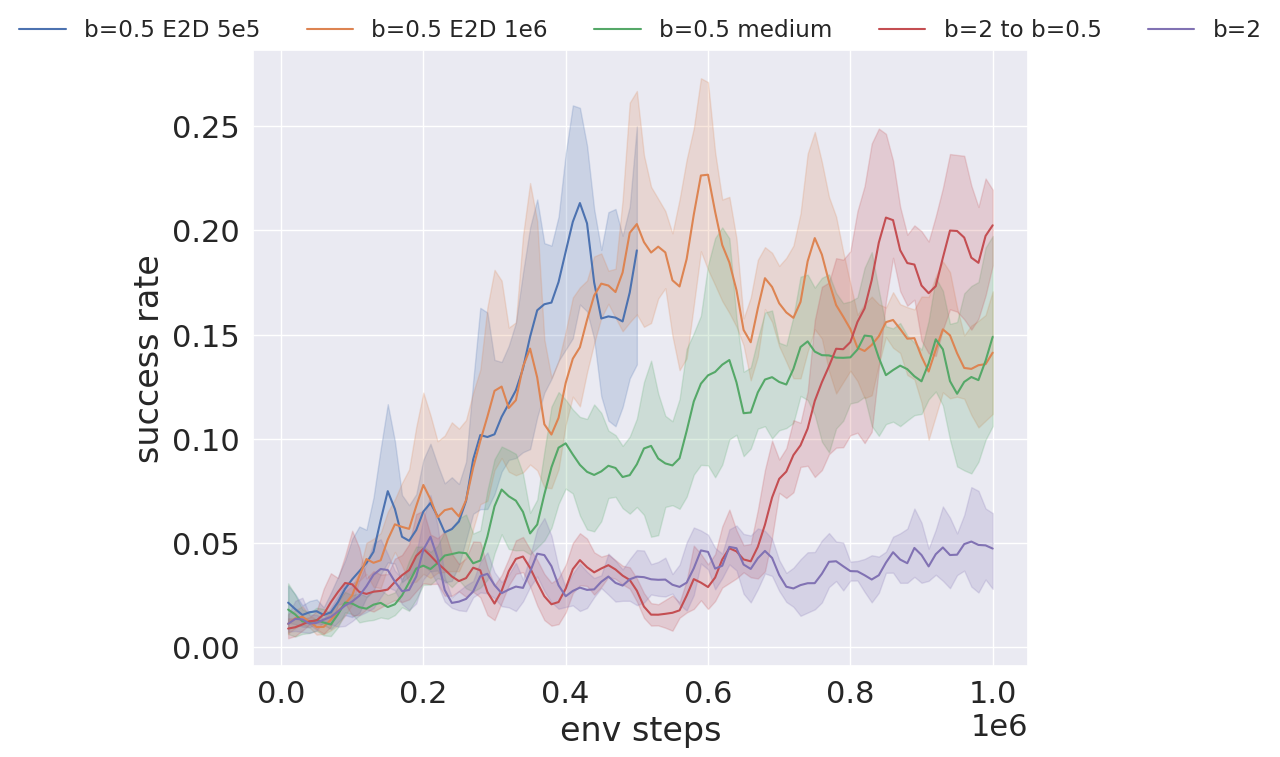

In [199]:
files = [
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_05_medium_5e5 = pd.concat([load_data("b=0.5 E2D 5e5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_05_medium_5e5))

files = [
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05/sac_medium_10hz_128_128_b_05_1e6steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_05_medium_1e6 = pd.concat([load_data("b=0.5 E2D 1e6", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_05_medium_1e6))





files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05medium = pd.concat([load_data("b=0.5 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05medium))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))






data_plot = pd.concat([
df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05medium,
df_two_stage_b_2_b05,
df_b_2
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")


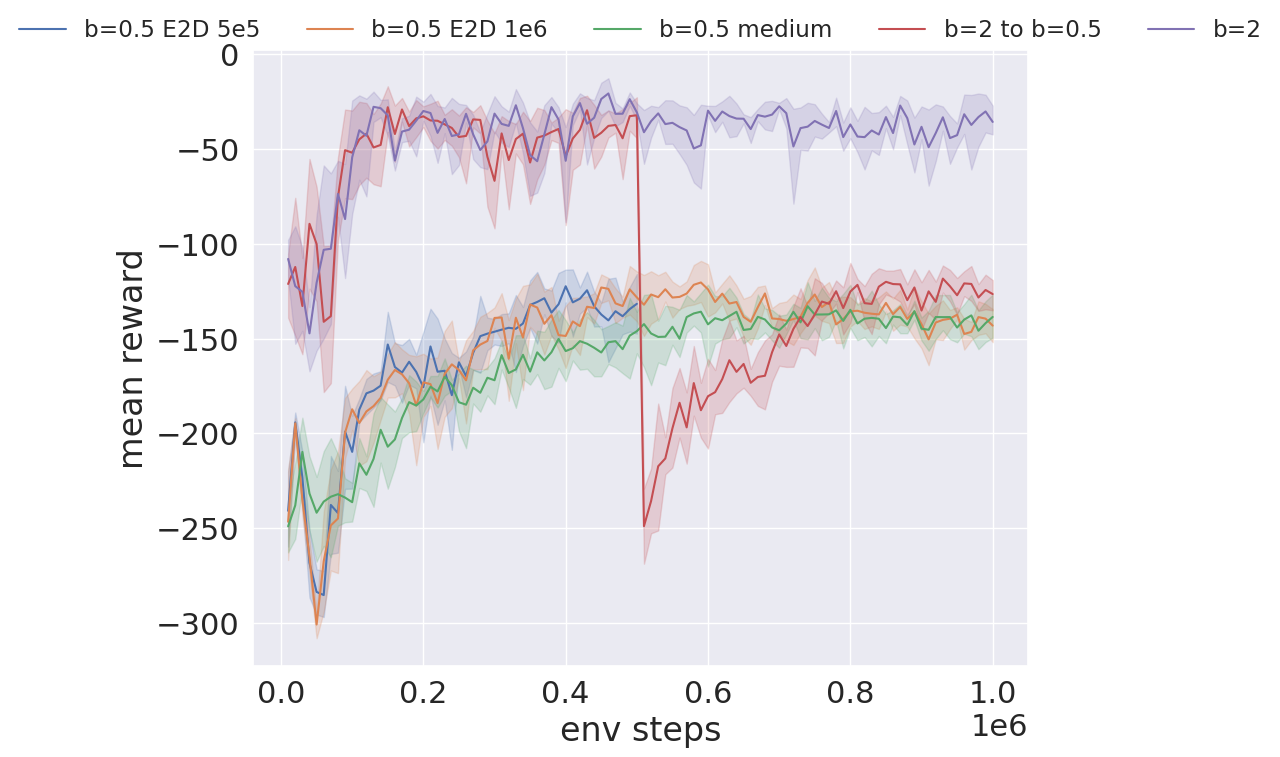

In [200]:
data_plot2 = pd.concat([
df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05medium,
df_two_stage_b_2_b05,
df_b_2

])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

### E2D b = 1

250
500
500
500
500
250


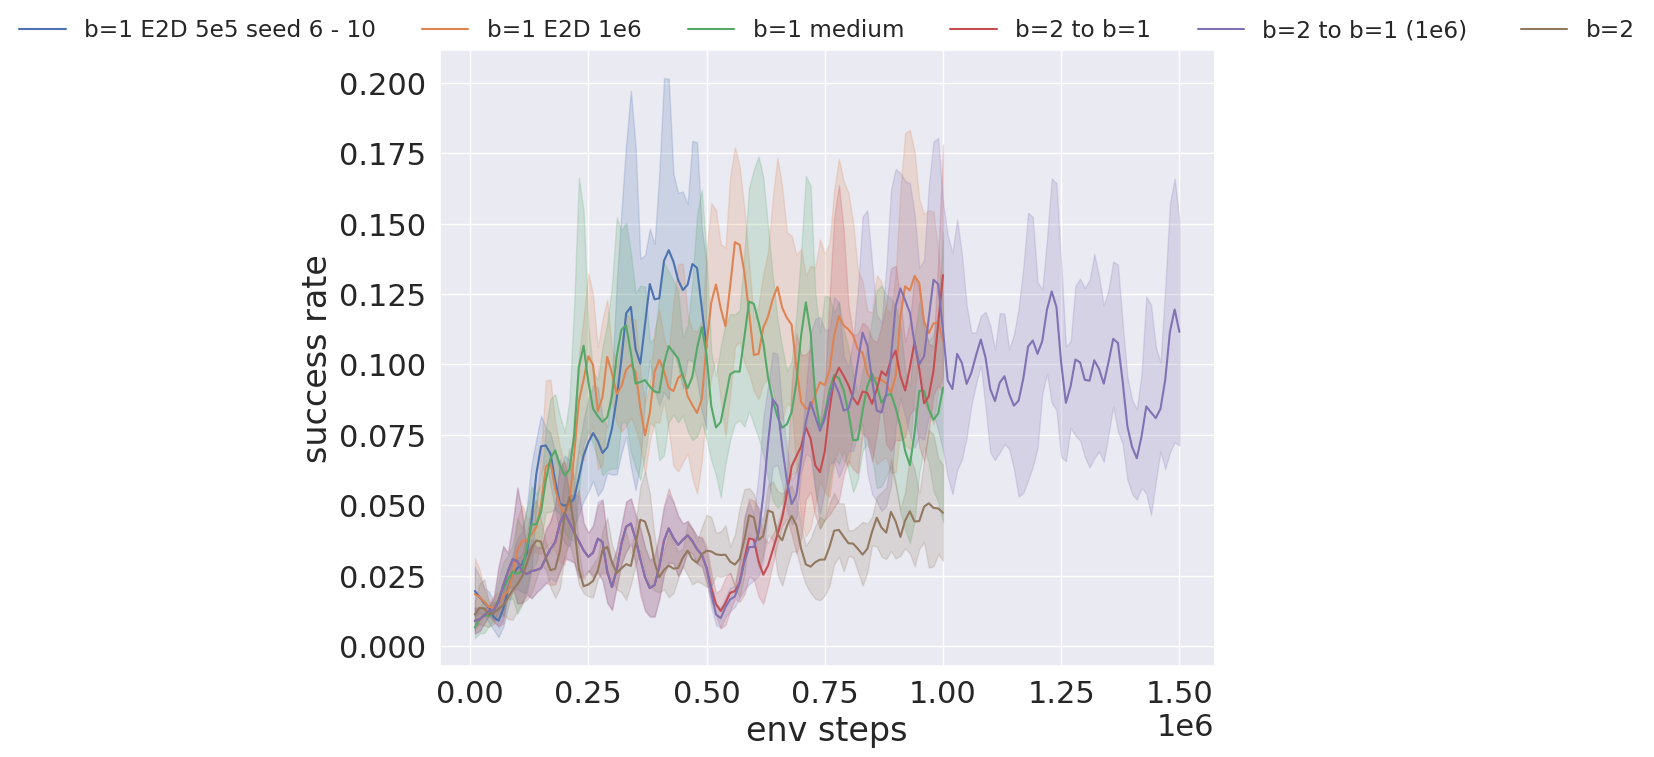

In [201]:
files = [
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_1_medium_5e5 = pd.concat([load_data("b=1 E2D 5e5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_1_medium_5e5))


files = [
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_1e6steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_1e6steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_1e6steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_1_medium_1e6 = pd.concat([load_data("b=1 E2D 1e6", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_1_medium_1e6))

files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium = pd.concat([load_data("b=1 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))



files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))



files = [
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_6_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_7_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_8_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_9_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1/sac_medium_10hz_128_128_b_1_5e5steps_seed_10_singleRL",

]
seed_strs = [
    "seed 6", 
    "seed 7", 
    "seed 8", 
    "seed 9", 
    "seed 10"
]
df_E2D_b_1_medium_5e5_seed_6_10 = pd.concat([load_data("b=1 E2D 5e5 seed 6 - 10", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_1_medium_5e5_seed_6_10))




data_plot = pd.concat([
#df_E2D_b_1_medium_5e5,
df_E2D_b_1_medium_5e5_seed_6_10,
df_E2D_b_1_medium_1e6,
df_b_1_medium,
df_two_stage_b_2_b1,
df_two_stage_b_2_b1_1e6,
df_b_2,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

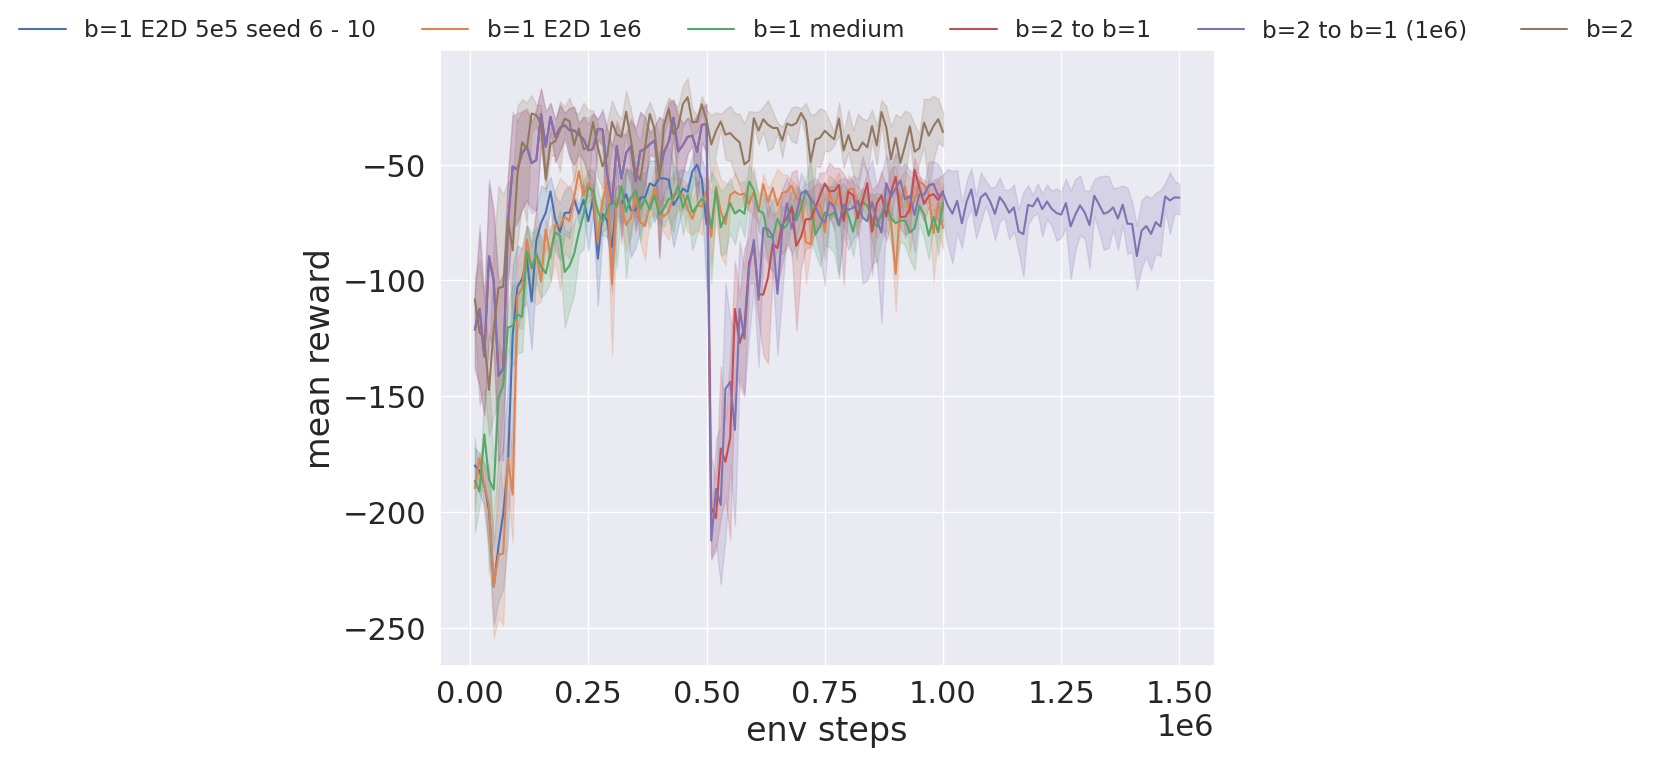

In [202]:
data_plot2 = pd.concat([
#df_E2D_b_1_medium_5e5,
df_E2D_b_1_medium_5e5_seed_6_10,
df_E2D_b_1_medium_1e6,
df_b_1_medium,
df_two_stage_b_2_b1,
df_two_stage_b_2_b1_1e6,
df_b_2,
])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

## reward devide

### reward b = 1

500
500


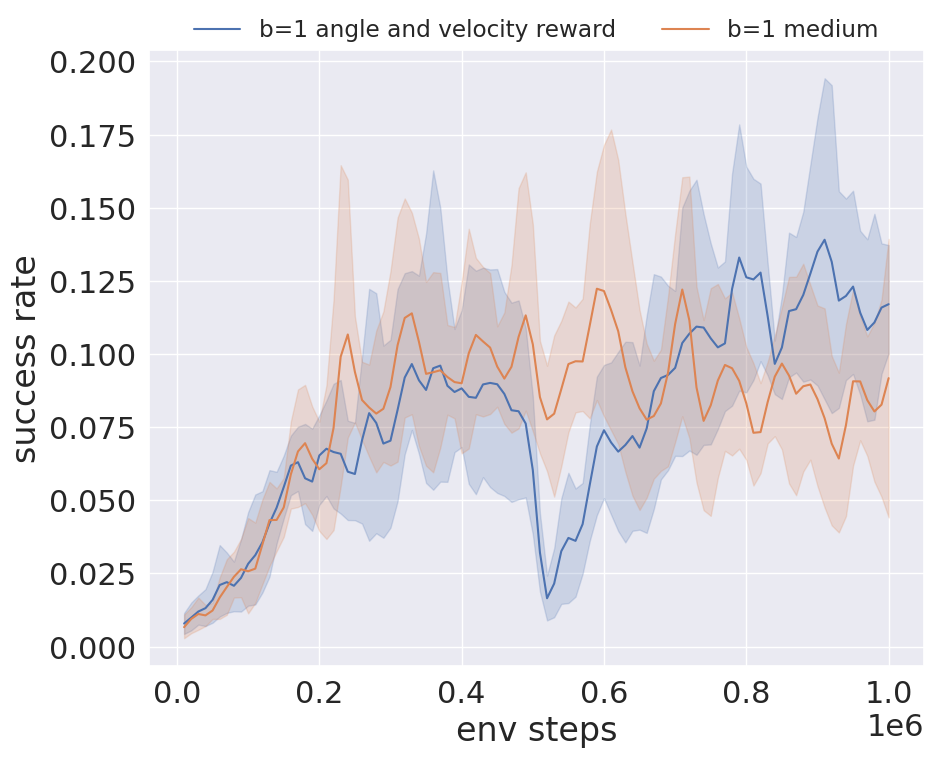

In [203]:
first_files = [
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_1_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_2_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_3_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_4_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_2_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_5_singleRL", 
  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_angle_and_velocity_reward = pd.concat([load_two_stage_data("b=1 angle and velocity reward", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_angle_and_velocity_reward))



files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium = pd.concat([load_data("b=1 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium))





data_plot = pd.concat([
df_b_1_angle_and_velocity_reward,
df_b_1_medium,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

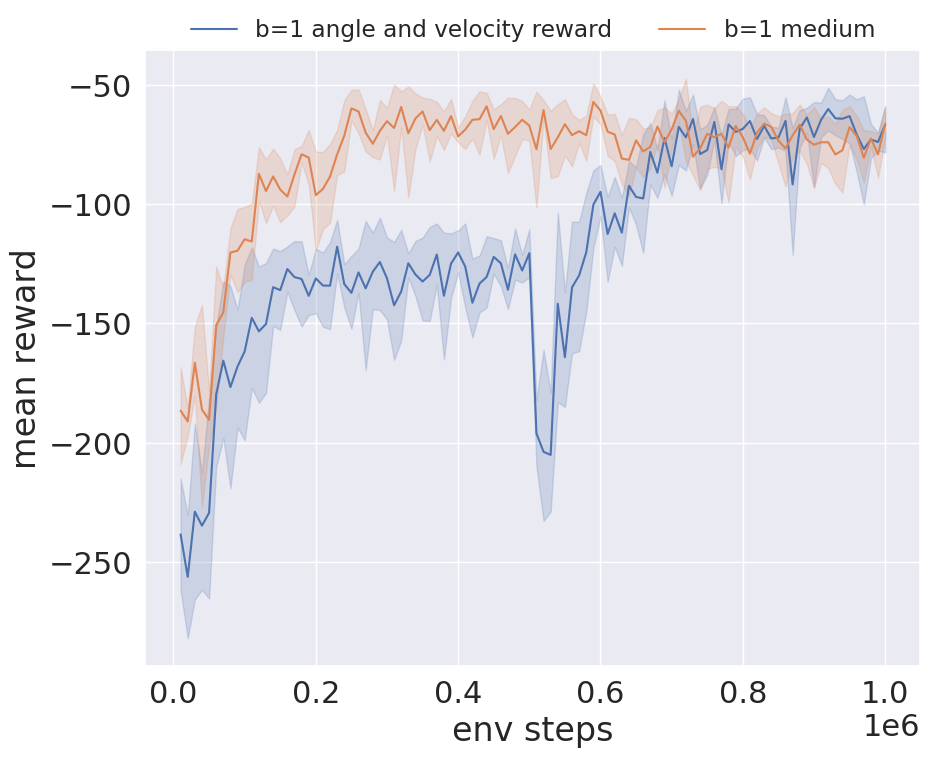

In [204]:
data_plot2 = pd.concat([
df_b_1_angle_and_velocity_reward,
df_b_1_medium,

])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

### reward devide b = 0.5

500
500


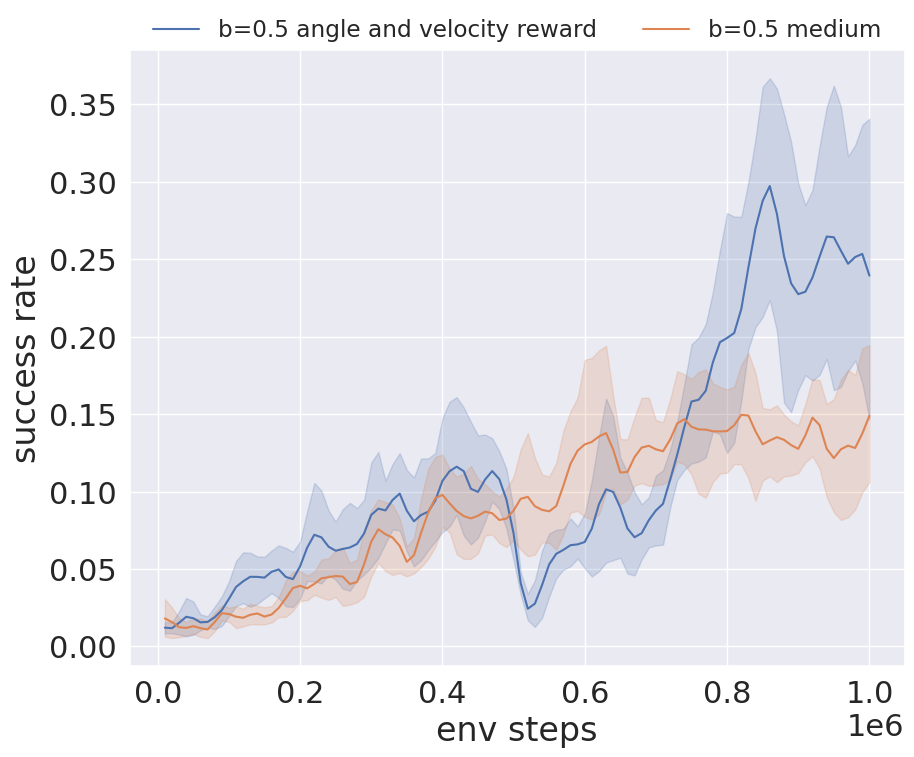

In [205]:
first_files = [
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_1_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_2_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_3_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_4_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_2_singleRL",  
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_5_singleRL",  
  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_angle_and_velocity_reward = pd.concat([load_two_stage_data("b=0.5 angle and velocity reward", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_angle_and_velocity_reward))

files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05medium = pd.concat([load_data("b=0.5 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05medium))


data_plot = pd.concat([
df_b_05_angle_and_velocity_reward,
df_b_05medium
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

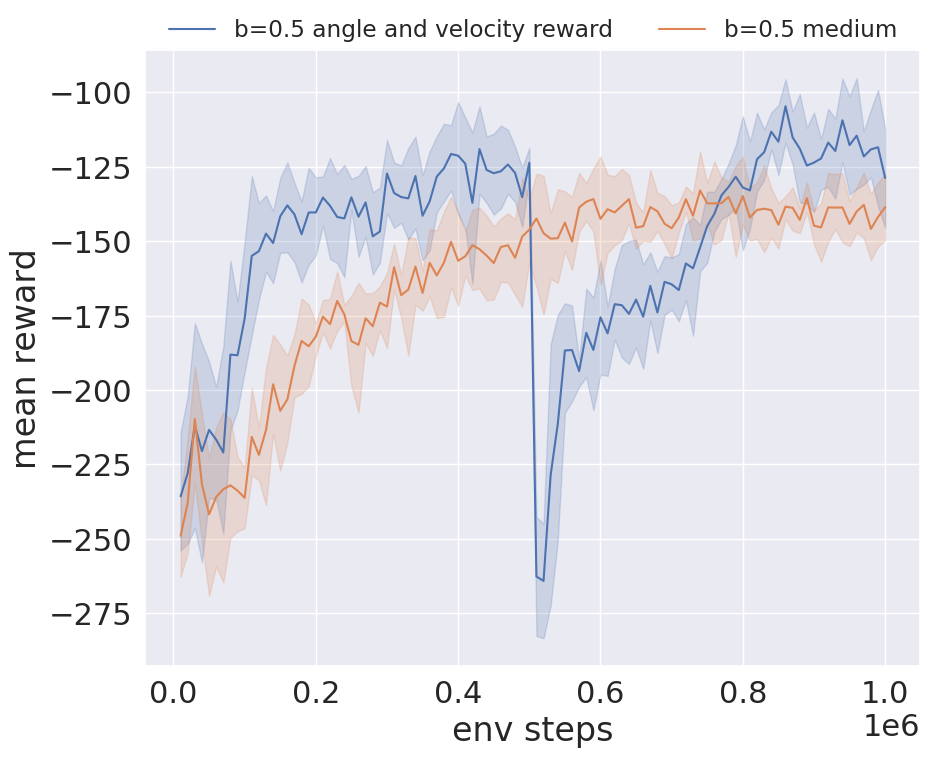

In [206]:
data_plot2 = pd.concat([
df_b_05_angle_and_velocity_reward,
df_b_05medium

])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")

sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.0)

PROJECT_ROOT_DIR = Path().absolute().parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [ ]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [ ]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [ ]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [ ]:
SMOOTH = True